In [1]:
import pandas as pd
df = pd.read_csv('pop4.csv', names = ['X', 'Y'])
df

,X,Y
0,0.898470,0.914130
1,0.032447,-0.078569
2,-1.143100,-0.923640
3,-0.112010,-0.085881
4,1.002200,0.948440
...,...,...
295,0.147650,-0.008015
296,0.129640,0.027493
297,0.071966,-0.207020
298,0.914600,1.118100


In [2]:
# import required libraries
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
#plot.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

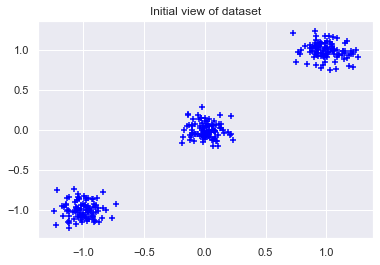

In [3]:
plt.scatter(df['X'],df['Y'],color='blue', marker='+')
plt.title ('Initial view of dataset', size ='12')
plt.show()

In [27]:
# Elbow method to minimize WSS(within-cluster sum of square)
Sum_of_squared_distances = []
# Using a loop to run K-Means for a range of clusters and collecting the square of distance
K = range (2,10)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_) 

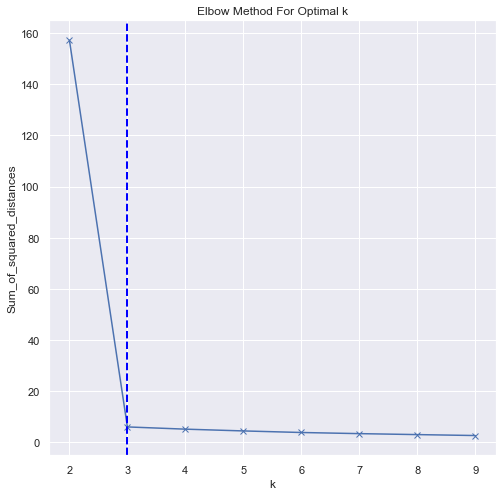

In [28]:
#Scatter plot to visualize the elbow
fig = plt.figure(figsize =(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

# The optimal K is determined at 4. This is shown at the deep end of the elbow after which the slope becomes more flattening.
number_of_clusters = 3
plt.axvline(x = number_of_clusters, linewidth=2, color ='blue', linestyle = '--')
plt.show()

In [29]:
from sklearn.cluster import KMeans  
Kmean = KMeans(n_clusters=3)
km_labels = Kmean.fit(df)

In [30]:
km_labels = Kmean.fit_predict(df)
km_labels
# how many observations are in each cluster
km_labels =pd.DataFrame(km_labels, columns=['cluster'])
km_labels.groupby('cluster').size()

cluster
0    100
1    100
2    100
dtype: int64

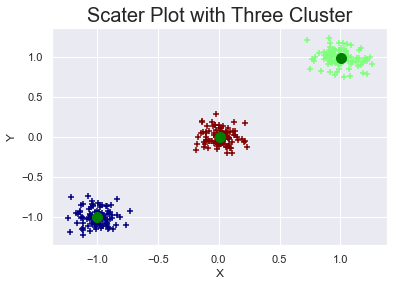

In [31]:
km_labels = Kmean.fit_predict(df)
centroids = Kmean.cluster_centers_
plt.scatter(df['X'],df['Y'], c=km_labels,cmap='jet', marker='+')
plt.scatter(centroids[:, 0], centroids[:, 1],c='green', s=100)
plt.title ('Scater Plot with Three Cluster', size ='20')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Silhouette: 0.8725935348011179


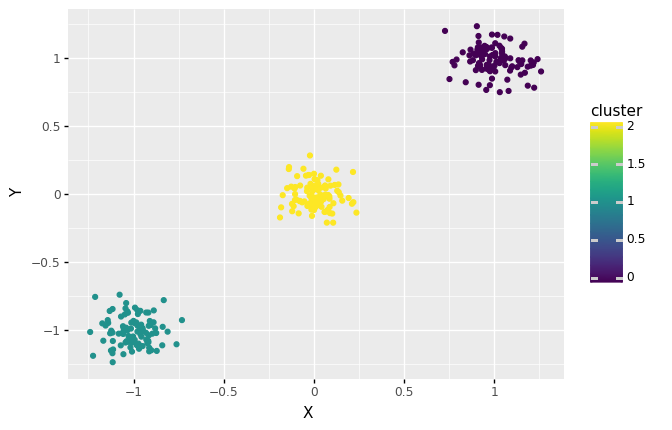

<ggplot: (133223664580)>

In [32]:
%matplotlib inline
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
#plot.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from plotnine import *
df = pd.read_csv('pop4.csv', names = ['X', 'Y'])

gmm = GaussianMixture(n_components =3)
gmm.fit(df)
cluster = gmm.predict(df)
#cluster

print('Silhouette:', silhouette_score(df, cluster))
df['cluster'] = cluster
(ggplot(df,aes(df['X'], df['Y'], color ='cluster'))+geom_point())